In [18]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [47]:
adulttraps = pd.DataFrame.from_csv(open('Data/AeAegyptiBrazil/Adult traps data-Table 1.csv',
                                       'r'))
fig2traps = pd.DataFrame.from_csv(open('Data/AeAegyptiBrazil/Fig 2-Table 1.csv',
                                       'r'))

#Run this if you want your times to work correctly
adulttraps['DATE_COLLECTED'] = adulttraps[['DATE_COLLECTED']].applymap(lambda s: pd.to_datetime(s))

In [65]:
fig2traps

,Fluorecent Larvae,Fluorescent larvae -95%CI,Fluorescent larvae +95%CI,Released/ha/week
Date,,,,
5-11 May,NaN,NaN,NaN,2804.477273
12-18 May,0.005870,0.005321,0.009225,3160.318182
19-25 May,0.044136,0.023628,0.041073,3029.214286
26 May-1 June,0.123780,0.084853,0.124621,2777.575758
2-8 June,0.111111,0.065323,0.074434,2546.984848
9-15 June,0.068522,0.045691,0.070482,2465.053030
16-22 June,0.168831,0.098236,0.115896,0.000000
23-29 June,0.082294,0.055894,0.088260,0.000000
30 June-6 July,0.013158,0.012142,0.023985,NaN


In [64]:
len(fig2traps)

9

In [55]:
adulttraps.dtypes

Lat                   float64
Long                  float64
Area                   object
DATE_SET_UP            object
DATE_COLLECTED         object
Days_Trapping         float64
Trap_Recoverd         float64
Males_Ae_aegypti      float64
Females_Ae_aegypti    float64
Male_Culex            float64
Female_Culex          float64
Culex                   int64
Trap_Type              object
Male_Unmarked         float64
Female_Unmarked       float64
Male_M_1              float64
Female_M_1            float64
Male_M_2              float64
Female_M_2            float64
Male_M_3              float64
Female_M_3            float64
Male_M_4              float64
Female_M_4            float64
dtype: object

In [44]:
adulttraps['Area'].unique()

array(['B/A', 'U', 'B', 'A'], dtype=object)

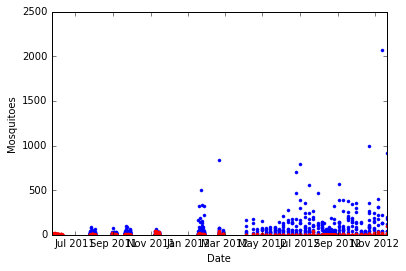

In [20]:

plt.plot(adulttraps['DATE_COLLECTED'],adulttraps['Female_Culex'], 'b.', \
        adulttraps['DATE_COLLECTED'],adulttraps['Females_Ae_aegypti'], 'r.')
plt.xlabel('Date')
plt.ylabel('Mosquitoes')


plt.show()

#Dang it, I need to try to sum over dates for an aggregate measure.

In [58]:
pivotculex = adulttraps.pivot_table(values='Male_Culex',index='DATE_COLLECTED',
                         aggfunc=sum)
pivotaedes = adulttraps.pivot_table(values='Males_Ae_aegypti',index='DATE_COLLECTED',
                         aggfunc=sum)

In [32]:
pivotculex.index

DatetimeIndex(['2011-05-24', '2011-05-25', '2011-05-26', '2011-05-27',
               '2011-05-28', '2011-05-29', '2011-05-30', '2011-05-31',
               '2011-06-01', '2011-06-02',
               ...
               '2012-09-17', '2012-09-24', '2012-10-01', '2012-10-08',
               '2012-10-15', '2012-10-22', '2012-10-29', '2012-11-05',
               '2012-11-12', '2012-11-19'],
              dtype='datetime64[ns]', name='DATE_COLLECTED', length=113, freq=None)

In [45]:
adulttraps.pivot_table(values='Females_Ae_aegypti',index='DATE_COLLECTED',
                         aggfunc=sum)

DATE_COLLECTED
2011-05-24     44
2011-05-25     47
2011-05-26     59
2011-05-27     55
2011-05-28     19
2011-05-29     20
2011-05-30     36
2011-05-31     31
2011-06-01     27
2011-06-02     23
2011-06-03     26
2011-06-04     15
2011-06-05     18
2011-06-06     13
2011-06-07     10
2011-06-08     22
2011-06-09      7
2011-07-26      4
2011-07-27      9
2011-07-28     35
2011-07-29     11
2011-07-30     10
2011-07-31      5
2011-08-01     10
2011-08-02      6
2011-08-30     23
2011-08-31      9
2011-09-01     13
2011-09-02      7
2011-09-03      5
             ... 
2012-08-10      3
2012-08-11      1
2012-08-12      2
2012-08-13      0
2012-08-14      0
2012-08-15      5
2012-08-16      2
2012-08-17      5
2012-08-18      3
2012-08-19      5
2012-08-20      1
2012-08-21      1
2012-08-22      3
2012-08-23      1
2012-08-24      1
2012-08-25      2
2012-08-26      1
2012-08-27      1
2012-09-03     28
2012-09-10     20
2012-09-17     16
2012-09-24     10
2012-10-01     18
2012-10-08   

In [46]:
sum(pivotaedes)

1937.0

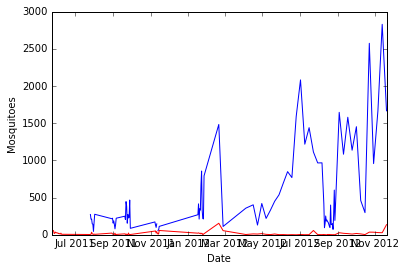

In [41]:
plt.plot(pivotculex.index, pivotculex, 'b-',\
        pivotaedes.index, pivotaedes, 'r-')
plt.xlabel('Date')
plt.ylabel('Mosquitoes')


plt.show()
#Nope, not terribly useful.

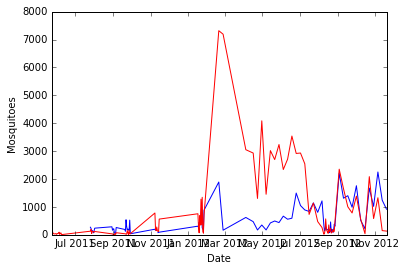

In [59]:
plt.plot(pivotculex.index, pivotculex, 'b-',\
        pivotaedes.index, pivotaedes, 'r-')
plt.xlabel('Date')
plt.ylabel('Mosquitoes')


plt.show()
#Males

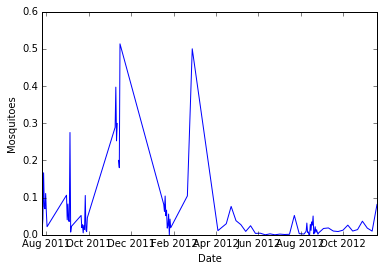

In [50]:
plt.plot(pivotculex.index, pivotaedes/pivotculex, 'b-')
plt.xlabel('Date')
plt.ylabel('Mosquitoes')


plt.show()
#Nope, not terribly useful.

In [6]:
adulttraps['Females_Ae_aegypti'].unique()
adulttraps['DATE_COLLECTED'].unique()

array(['5/24/11', '5/25/11', '5/26/11', '5/27/11', '5/28/11', '5/29/11',
       '5/30/11', '5/31/11', '6/1/11', '6/2/11', '6/3/11', '6/4/11',
       '6/5/11', '6/6/11', '6/7/11', '6/8/11', '6/9/11', '7/26/11',
       '7/27/11', '7/28/11', '7/29/11', '7/30/11', '7/31/11', '8/1/11',
       '8/2/11', '8/30/11', '8/31/11', '9/1/11', '9/2/11', '9/3/11',
       '9/4/11', '9/5/11', '9/6/11', '9/20/11', '9/21/11', '9/22/11',
       '9/23/11', '9/24/11', '9/25/11', '9/26/11', '9/27/11', '9/28/11',
       '9/29/11', '11/8/11', '11/9/11', '11/10/11', '11/11/11', '11/12/11',
       '11/13/11', '11/14/11', '11/15/11', '1/17/12', '1/18/12', '1/19/12',
       '1/20/12', '1/21/12', '1/22/12', '1/23/12', '1/24/12', '1/25/12',
       '1/26/12', '1/27/12', '2/20/12', '2/27/12', '4/4/12', '4/16/12',
       '4/23/12', '4/30/12', '5/7/12', '5/14/12', '5/21/12', '5/28/12',
       '6/4/12', '6/11/12', '6/18/12', '6/25/12', '7/2/12', '7/9/12',
       '7/16/12', '7/23/12', '7/30/12', '8/6/12', '8/9/12', '8/10/1

In [12]:
pd.to_datetime()

TypeError: to_datetime() missing 1 required positional argument: 'arg'

In [57]:
adulttraps['DATE_COLLECTED'].dtypes

dtype('<M8[ns]')

In [23]:
adulttraps['DATE_COLLECTED'].head()

Trap_name
D1RF1   2011-05-24
D1RF2   2011-05-24
D1RF3   2011-05-24
D1RF4   2011-05-24
D1RF5   2011-05-24
Name: DATE_COLLECTED, dtype: datetime64[ns]

In [22]:
adulttraps[adulttraps['Females_Ae_aegypti']== '2012-11-19'].head()

/Users/Spirapple/anaconda/lib/python3.5/site-packages/pandas/core/ops.py:680: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison